# 1. Importing libraries and the final data set we will us for the analysis 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/danielmccormick/Desktop/CareerFoundry/Python/08-23 Instacart Basket Analysis'

In [3]:
df_instacart = pd.read_pickle(os.path.join(path, 'IC_Data', 'IC_prepared_data', 'instacart_total_data_v2'))

# 2. Security Implications/PII Considerations with our data set 

In [4]:
# We will need to examine each column of data to confirm if there is any data that could be considered 
# personally identifiable. I will change the setting to "max_columns" so that we are able to view all columns
# in the dataframe

In [5]:
pd.set_option("display.max_columns", None)
df_instacart.head()

,user_id,user_gender,user_state,user_age,user_date_joined,user_num_dependents,user_marriage_stat,user_income,order_id,user_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_med_days_since_order,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busier Days,Average Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Normal Busyness Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busier Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Normal Busyness Days,Average Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Less Busy Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both


In [6]:
# since we already removed the customer first and last name from the dataset in previous Exercises, there is no 
# PII in the dataset and we are good to continue with out analysis. 

# 3. Creating a column in our instacart dataframe that breaks each user into a region based on their state

In [7]:
# we will need to use a for loop with an if statement to sort the users into regions

In [9]:
region_result = []

for value in df_instacart['user_state']:
   if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    region_result.append("Northeast")
   elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    region_result.append("Midwest")
   elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    region_result.append("South")
   else:
    region_result.append("West")

In [10]:
# We wil then add the new column onto the total instacart datafame
df_instacart['user_region'] = region_result

In [11]:
# checking to make sure that there are no values in the new column other than th 4 regions
df_instacart['user_region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: user_region, dtype: int64

In [25]:
# Marketing wants to understand spending habits by region so we will create a cross tab of the new region column
# and the spending flag we created in an earlier exerice
crosstab_region = pd.crosstab(df_instacart_dept['user_region'], df_instacart_dept['spending_flag'], dropna = False)

In [26]:
crosstab_region

spending_flag,High Spender,Low Spender
user_region,,
Midwest,148670,7112843
Northeast,103120,5361565
South,199225,10111914
West,152269,7774958


In [14]:
# We will copy the crosstab we just created and paste it into an Excel file for distribution and further analysis
# and visualization
crosstab_region.to_clipboard()

# 4. Creating a flag that breaks customers into two groups those with less than 5 order and those with 5 or more orders

In [15]:
# I will be using a .loc function to compare the max_order column for each user to 5 and create a column "volume_flag"
# based on the results of the comparison

In [16]:
df_instacart.loc[df_instacart['max_order'] >= 5,'volume_flag'] = 'High Volume'
df_instacart.loc[df_instacart['max_order'] < 5, 'volume_flag'] = 'Low Volume'

In [17]:
df_instacart['volume_flag'].value_counts()

High Volume    30964564
Low Volume      1440295
Name: volume_flag, dtype: int64

In [18]:
df_instacart.head()

,user_id,user_gender,user_state,user_age,user_date_joined,user_num_dependents,user_marriage_stat,user_income,order_id,user_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_med_days_since_order,frequency_flag,_merge,user_region,volume_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busier Days,Average Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Normal Busyness Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busier Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Normal Busyness Days,Average Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Less Busy Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume


In [19]:
# next we will need to create and export a new instacart dataframe that only includes the rows of data for users 
# who are considered high volumne customers based on the flag we created in the previous step

In [23]:
df_instacart_highvolume = df_instacart.loc[df_instacart['volume_flag'] == 'High Volume']

In [24]:
df_instacart_highvolume['volume_flag'].value_counts()

High Volume    30964564
Name: volume_flag, dtype: int64

In [25]:
df_instacart_highvolume.head()

,user_id,user_gender,user_state,user_age,user_date_joined,user_num_dependents,user_marriage_stat,user_income,order_id,user_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_med_days_since_order,frequency_flag,_merge,user_region,volume_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busier Days,Average Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Normal Busyness Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busier Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Normal Busyness Days,Average Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Less Busy Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume


In [26]:
len(df_instacart_highvolume)

30964564

# 5. Create a profiling variable based on age, income, goods purchased, and number of dependents. 

In [31]:
# Based on the data we have available, I will use the following logic for creating a user_profile column: 
# If num-dependents 0 and income <=$50k then “Low-income childless adult” 
# If num-dependents 0 and income >$50k and <$100k then “Middle-income childless adult”
# If num-dependents 0 and income >=$100k then “High-income childless adult” 
# If num-dependents > 1, income <=$50k, age <= 30 then “Young low-income parent” 
# If num-dependents > 1, income >$50k and <$100k, age <= 30 then “Young middle-income parent” 
# If num-dependents > 1, income >=$100k, age <=30 then “Young high-income parent” 
# If num-dependents > 1, income <=$50k, age >30 and <45 then “middle-aged low-income parent” 
# If num-dependents > 1, income >$50k and <$100k, age >30 and <45 then “Middle-aged middle-income parent” 
# If num-dependents > 1, income >=$100k, age >30 and <45 then “Middle-aged high-income parent” 
# If num-dependents > 1, income <=$50k, age >45 then “older low-income parent” 
# If num-dependents > 1, income >$50k and <$100k, age >45 then “Older middle-income parent” 
# If num-dependents > 1, income >=$100k, age >45 then “Older high-income parent” 

In [32]:
# I will create a user defined function to sort each row within the high volume instacart data frame based on the 
# above logic. 

In [33]:
def user_profile(row): 
    
    if (row['user_num_dependents'] == 0) and (row['user_income'] <= 50000):
        return 'Low Income Childless Adult'
    elif (row['user_num_dependents'] == 0) and (row['user_income'] > 50000) and (row['user_income'] < 100000):
        return 'Middle Income Childless Adult'
    elif (row['user_num_dependents'] == 0) & (row['user_income'] >= 100000):
        return "High Income Childless Adult"
    elif (row['user_num_dependents'] > 0) and (row['user_income'] <= 50000) and (row['user_age'] <= 30):
        return 'Low Income Young Parent'
    elif (row['user_num_dependents'] > 0) and (row['user_income'] > 50000) and (row['user_income'] < 100000) and (row['user_age'] <= 30):
        return 'Middle Income Young Parent'
    elif (row['user_num_dependents'] > 0) and (row['user_income'] >= 100000) and (row['user_age'] <= 30):
        return 'High Income Young Parent'
    elif (row['user_num_dependents'] > 0) and (row['user_income'] <= 50000) and (row['user_age'] > 30) and (row['user_age'] < 45):
        return 'Low Income Middle Aged Parent'
    elif (row['user_num_dependents'] > 0) and (row['user_income'] > 50000) and (row['user_income'] < 100000) and (row['user_age'] > 30) and (row['user_age'] < 45):
        return 'Middle Income Middle Aged Parent'
    elif (row['user_num_dependents'] > 0) and (row['user_income'] >= 100000) and (row['user_age'] > 30) and (row['user_age'] < 45):
        return 'High Income Middle Aged Parent'
    elif (row['user_num_dependents'] > 0) and (row['user_income'] <= 50000) and (row['user_age'] >= 45):
        return 'Low Income Older Parent'
    elif (row['user_num_dependents'] > 0) and (row['user_income'] > 50000) and (row['user_income'] < 100000) and (row['user_age'] >= 45):
        return 'Middle Income Older Parent'
    else: return 'High Income Older Parent'

In [34]:
df_instacart_highvolume['user_profile'] = df_instacart_highvolume.apply(user_profile, axis = 1)

In [35]:
df_instacart_highvolume.head(10)

,user_id,user_gender,user_state,user_age,user_date_joined,user_num_dependents,user_marriage_stat,user_income,order_id,user_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,user_med_days_since_order,frequency_flag,_merge,user_region,volume_flag,user_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busier Days,Average Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume,High Income Older Parent
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Normal Busyness Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume,High Income Older Parent
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busier Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume,High Income Older Parent
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Normal Busyness Days,Average Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume,High Income Older Parent
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Less Busy Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume,High Income Older Parent
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,1,17,19.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Busier Days,Average Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume,High Income Older Parent
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,1,8,21.0,38928,2,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Busier Days,Average Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume,High Income Older Parent
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,38928,3,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Normal Busyness Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume,High Income Older Parent
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Busier Days,Most Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume,High Income Older Parent
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,2,9,NaN,6184,1,0,Clementines,32,4,4.3,Low-range product,Regularly busy,Normal Busyness Days,Average Orders,8,New Customer,7.988889,Low Spender,19.0,Regular customer,both,Midwest,High Volume,High Income Older Parent


In [36]:
df_instacart_highvolume['user_profile'].value_counts()

High Income Older Parent            9351110
Middle Income Young Parent          3864494
High Income Childless Adult         3568956
Middle Income Childless Adult       3323805
Middle Income Middle Aged Parent    3267195
Middle Income Older Parent          2939114
High Income Middle Aged Parent      1141660
Low Income Older Parent             1122102
Low Income Childless Adult           846920
Low Income Young Parent              720698
Low Income Middle Aged Parent        672834
High Income Young Parent             145676
Name: user_profile, dtype: int64

In [38]:
# exporting the high volume dataframe
df_instacart_highvolume.to_pickle(os.path.join(path, 'IC_Data', 'IC_prepared_data', 'df_instacart_highvolume'))

# 6. Creating a visualization to show the distribution of user profiles. 
# Since the user_profile column is not quantitaive data, a histogram would 
# not work for this. So I will create a bar chart based on a value_counts() applied to the user_profile column 

In [3]:
# After running a few scripts to try to create a bart chart of the data I realized that you cannot simply do
# a straight value_counts on the user_profile column and then plot that. Since one user has a row associated with 
# every order they place, if one user is a "High income Chidless Adult" and places 40 orders then a value_counts
# on the user_profile column with capture each of those 40 rows as value for the "High Income Childless Adult" value 
# count. For that reason we will need to group by the user_profile column that we are trying to visualize, and then 
# do a count of every unique user_id for each user_profile group. This will give us an accurate count of the actual 
# number of users in each user_profile group as opposed to just a count of orders done by each user_profile group. 

In [3]:
df_instacart_highvolume = pd.read_pickle(os.path.join(path, 'IC_Data', 'IC_prepared_data', 'df_instacart_highvolume'))

In [6]:
# To achieve this i will groupby the user_profile column, and then use .nunique applied to the user_id column to count
# the number of unique user_ids that occur within each user_profile group. 
user_profile = df_instacart_highvolume.groupby('user_profile')['user_id'].nunique()

In [7]:
user_profile.to_clipboard()

In [6]:
# as a check I will see how many unique user_ids there are in total and confirm that the sum of all the group counts
# from the previous step equal the total. 
df_instacart_highvolume['user_id'].nunique()

162631

<Axes: xlabel='user_profile'>

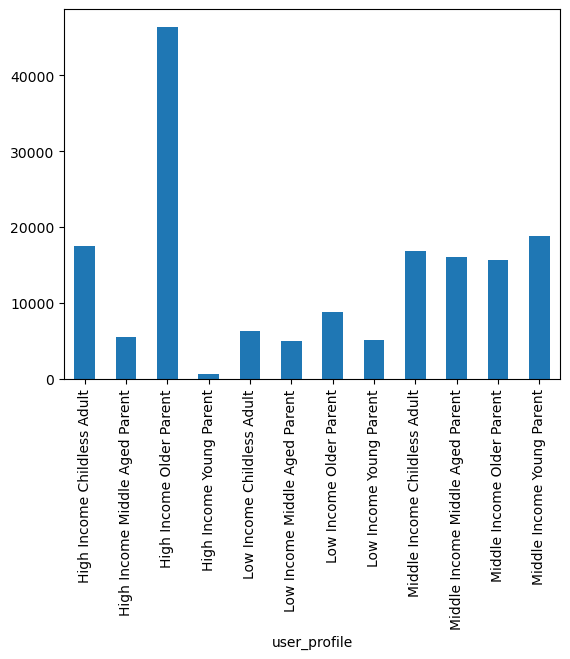

In [7]:
df_instacart_highvolume.groupby('user_profile')['user_id'].nunique().plot.bar()

In [8]:
# based on the count of unque values and the bar chart above, the most common user_profile in our data set is high
# income older parent. Meaning someone with at least one dependent who makes over $100k per year and who is 45 or 
# older. The least common profile is a high income young parent, or someone with at least 1 dependent, over $100k of
# income, and 30 years old or younger. 

# 7. Determining the max, min, and average usage_frequency and expenditure for each user_profile group

In [9]:
# to determine usage frequency, I will group by user_profile and then take the mean, mix, max of the max_order 
# to determine usage frequency across each user_profile group 
df_instacart_highvolume.groupby('user_profile').agg({'max_order':['mean','min','max']})

max_order        
                                       mean min max
user_profile                                       
High Income Childless Adult       35.200429   5  99
High Income Middle Aged Parent    34.817094   5  99
High Income Older Parent          34.313653   5  99
High Income Young Parent          34.611823   5  99
Low Income Childless Adult        33.179070   5  99
Low Income Middle Aged Parent     32.245101   5  99
Low Income Older Parent           32.557137   5  99
Low Income Young Parent           31.301061   5  99
Middle Income Childless Adult     34.493939   5  99
Middle Income Middle Aged Parent  35.168954   5  99
Middle Income Older Parent        34.539381   5  99
Middle Income Young Parent        34.863215   5  99

In [10]:
# Next to look at expenditure by group I will group again by the user_profile and take the mean, min, and max of the 
# prices columns to determine how spending varies across the user_profiles. 
df_instacart_highvolume.groupby('user_profile').agg({'prices':['mean','min','max']})

prices           
                                      mean  min   max
user_profile                                         
High Income Childless Adult       7.950353  1.0  25.0
High Income Middle Aged Parent    7.964039  1.0  25.0
High Income Older Parent          7.954882  1.0  25.0
High Income Young Parent          7.852788  1.0  25.0
Low Income Childless Adult        6.715778  1.0  25.0
Low Income Middle Aged Parent     6.843287  1.0  25.0
Low Income Older Parent           6.503097  1.0  25.0
Low Income Young Parent           6.888539  1.0  25.0
Middle Income Childless Adult     7.890543  1.0  25.0
Middle Income Middle Aged Parent  7.934186  1.0  25.0
Middle Income Older Parent        7.762179  1.0  25.0
Middle Income Young Parent        7.948882  1.0  25.0

# 8. Looking at the user_profiles across regions and which departments they purchase items from 

In [11]:
# We are trying to determine if the user profiles we created are clustered in certain geographic regions. To do this 
# I will group by user_profile type first, and then by region. Then I will count how many unique users there are in 
# each profile/region combination. 
df_instacart_highvolume.groupby(['user_profile','user_region'])['user_id'].nunique()

user_profile                      user_region
High Income Childless Adult       Midwest         4130
                                  Northeast       3146
                                  South           5818
                                  West            4441
High Income Middle Aged Parent    Midwest         1351
                                  Northeast        976
                                  South           1753
                                  West            1382
High Income Older Parent          Midwest        11103
                                  Northeast       8140
                                  South          15348
                                  West           11810
High Income Young Parent          Midwest          172
                                  Northeast        107
                                  South            238
                                  West             166
Low Income Childless Adult        Midwest         1446
                   

<Axes: xlabel='user_profile,user_region'>

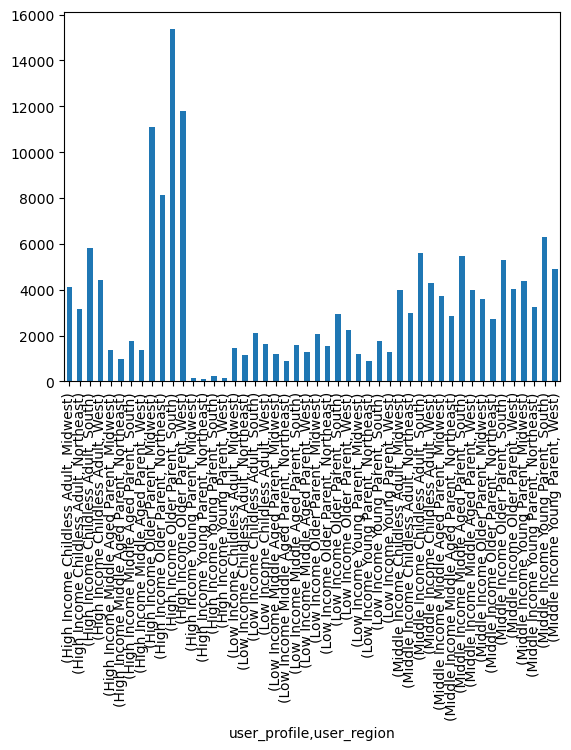

In [23]:
df_instacart_dept.groupby(['user_profile','user_region'])['user_id'].nunique().plot.bar()

In [ ]:
# Based on the results of grouping by the newly created user profiles and and region, the highest number of customers
# across all of the user_profile groupings come from the South, followed by the West, then Midwest, the Northeast. 
# This pattern seems to hold pretty consistently across all of the user_profile groups that we have created. 
# So it does not seem as though the make up of the user_profiles varies significantly across the regions of the country. 

In [13]:
# Next I want to analyze the relationship between the profile groups and the departments that they purchase items from
# I will want to do something similar to the previous step where I group by user_profile group and department. But
# I currently only have department_id in the data set. I do not have each department name included. I do 
# have a csv file that gives the department associated with each department_id. So I will have to import this file 
# and join it to the main dataframe on the department_id column. 

In [10]:
df_dep = pd.read_csv(os.path.join(path, 'IC_Data', 'IC_prepared_data', 'departments_wrangled.csv'), index_col = False)

In [11]:
df_dep

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [12]:
df_dep.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [13]:
df_dep

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [18]:
df_instacart_highvolume.dtypes

user_id                        object
user_gender                    object
user_state                     object
user_age                        int64
user_date_joined               object
user_num_dependents             int64
user_marriage_stat             object
user_income                     int64
order_id                        int64
user_order_count                int64
orders_day_of_week              int64
order_hour_of_day               int64
days_since_prior_order        float64
product_id                      int64
add_to_cart_order               int64
reordered                       int64
product_name                   object
aisle_id                        int64
department_id                   int64
prices                        float64
price_range_loc                object
busiest_day                    object
busiest_days                   object
busiest_period_of_day          object
max_order                       int64
loyalty_flag                   object
user_avg_pri

In [20]:
df_dep.dtypes

department_id     int64
department       object
dtype: object

In [21]:
# Joining the department data to the main instacart dataframe on the department_id column 
df_instacart_highvolume.drop('_merge', inplace=True, axis=1)

In [29]:
df_instacart_dept= df_instacart_highvolume.merge(df_dep_t_new, on = 'department_id', indicator = True)

In [30]:
df_instacart_dept.head()

,user_id,user_gender,user_state,user_age,user_date_joined,user_num_dependents,user_marriage_stat,user_income,order_id,user_order_count,...,loyalty_flag,user_avg_price,spending_flag,user_med_days_since_order,frequency_flag,user_region,volume_flag,user_profile,department,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,New Customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Volume,High Income Older Parent,beverages,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,New Customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Volume,High Income Older Parent,beverages,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,New Customer,7.988889,Low Spender,19.0,Regular customer,Midwest,High Volume,High Income Older Parent,beverages,both
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Regular Customer,7.057534,Low Spender,26.0,Non-frequent customer,West,High Volume,Middle Income Childless Adult,beverages,both
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,Regular Customer,7.057534,Low Spender,26.0,Non-frequent customer,West,High Volume,Middle Income Childless Adult,beverages,both


In [32]:
df_instacart_dept['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [33]:
# exporting the dataframe with department name included dataframe
df_instacart_dept.to_pickle(os.path.join(path, 'IC_Data', 'IC_prepared_data', 'df_instacart_dept'))

In [4]:
df_instacart_dept = pd.read_pickle(os.path.join(path, 'IC_Data', 'IC_prepared_data', 'df_instacart_dept'))

In [18]:
# now that we have the department name included in the dataframe, we can do a groupby user_profile and department with
# size() in order to have a count of the orders that included items for each department across the user_profiles 
pd.set_option("display.max_rows", None)
df_user_dept = df_instacart_dept.groupby(['user_profile','department']).size()

In [20]:
df_user_dept

user_profile                      department     
High Income Childless Adult       alcohol              18268
                                  babies               48476
                                  bakery              133566
                                  beverages           284111
                                  breakfast            75106
                                  bulk                  3532
                                  canned goods        119727
                                  dairy eggs          602605
                                  deli                117159
                                  dry goods pasta      97658
                                  frozen              247855
                                  household            78480
                                  international        30381
                                  meat seafood         82252
                                  missing               6962
                                  o

<Axes: xlabel='user_profile,department'>

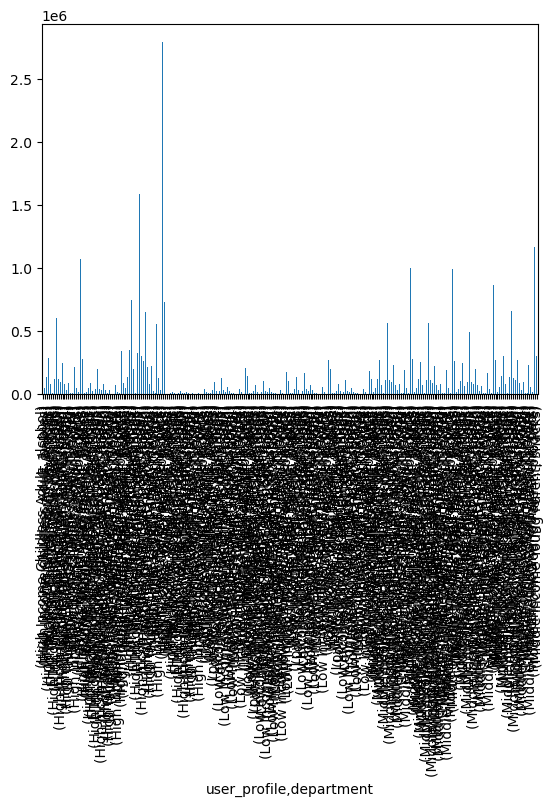

In [24]:
df_user_dept.plot.bar()

In [ ]:
# I have exported the table from the above script to Excel where I can perform further analysis of the buying
# patterns across the different user_profiles 

In [ ]:
# The visualization of the data is not useful because we have 12 different user_profile groups and then 20 departments, 
# so there are a significant amount of data points to try to include in the bar chart. 
# based on the results that we have exported out into Excel, the top 5 departments across all user_profiles are 
# produce, dairy eggs, beverages, frozen, and snacks. What is interesting is that the order of the top 5 departments 
# seems to change depending on the income level of the user, but not the age or parental status. 
# For example for all High Income users, regardless of age or parental status the top 5 departments are 
# 1. produce 2. dairy eggs 3. beverages 4. snacks 5. frozen. For all low income users regardless of age 
# or parental status the department order changes to 1. produce 2. snacks 3. dairy eggs 4. beverages 5. frozen. 
# For middle income users, regardless of age or parental status the department order changes to 
# 1. produce 2. dairy eggs 3. snacks 4. beverages 5. frozen. The fact that the order is totally consistent 
# across all user_profile groups at each income level would seem to indicate that out of the three factors we used
# to classify users into user_profile groups, income level has the biggest impact which departments they shop in the
# most. If you were marketing in high income area or on a channel that is used mostly by high income individuals, 
# you would want to target you marketing to produce, dairy eggs, and other fresh food departments. For low income 
# users, you would want to focus more on snacks. This could help inform marketing strategy. 

# 9. Exporting any visualizations that are worth using in our report

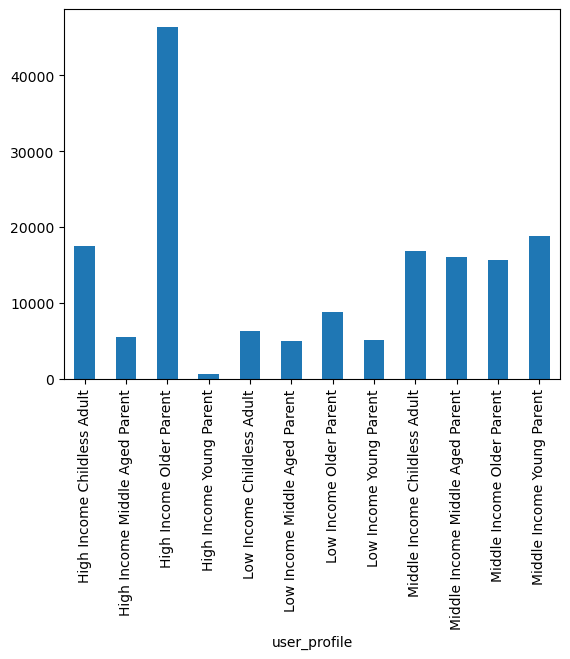

In [31]:
bar_profiles = df_instacart_dept.groupby('user_profile')['user_id'].nunique().plot.bar()

In [32]:
#saving this visualization in project folder
bar_profiles.figure.savefig(os.path.join(path, 'IC_Analysis', 'IC_visualizations', 'profiles_bar.png'))

In [35]:
# exporting tables that gives mean, min, max of orders and prices for each user_profile group to 
# Excel for use in further analysis
stats_orders_profiles = df_instacart_dept.groupby('user_profile').agg({'max_order':['mean','min','max']})

In [37]:
stats_orders_profiles.to_clipboard()

In [38]:
stats_prices_profiles = df_instacart_dept.groupby('user_profile').agg({'prices':['mean','min','max']})

In [39]:
stats_prices_profiles.to_clipboard()

In [41]:
# Exporting the results of grouping the user_profile groups with region and department to Excel for further analysis 
profile_region_group = df_instacart_dept.groupby(['user_profile','user_region'])['user_id'].nunique()

In [42]:
profile_region_group.to_clipboard()

In [43]:
df_user_dept = df_instacart_dept.groupby(['user_profile','department']).size()

In [44]:
df_user_dept.to_clipboard()